In [1]:
#Імпортуємо модулі
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train original shape:", x_train.shape)
print("y_train original shape:", y_train.shape)

x_train original shape: (60000, 28, 28)
y_train original shape: (60000,)


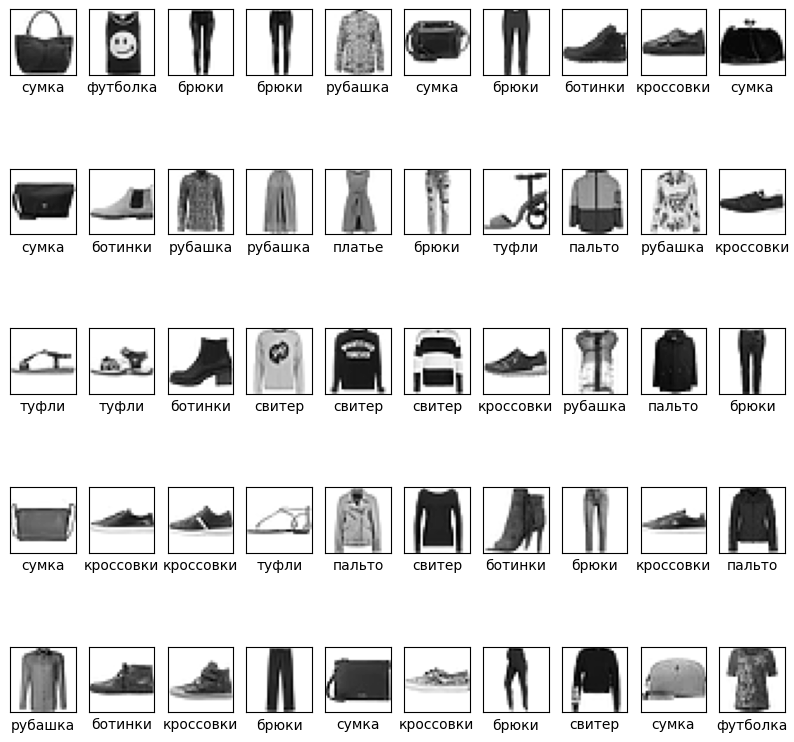

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [4]:
#Нормалізуємо дані
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [5]:
#Зміна розмірності зображень
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

#Змінюємо з (28, 28) в (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Змінюємо мітки в категорії
y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [6]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.25),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [9]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
          y_train,
          batch_size = 64,
          epochs = 8,
          validation_data = (x_valid, y_valid),
          callbacks = [checkpointer])

Epoch 1/8
859/860 [============================>.] - ETA: 0s - loss: 0.5245 - accuracy: 0.8073
Epoch 1: val_loss improved from inf to 0.34210, saving model to model.weights.best.hdf5
860/860 [==============================] - 25s 29ms/step - loss: 0.5244 - accuracy: 0.8073 - val_loss: 0.3421 - val_accuracy: 0.8772
Epoch 2/8
859/860 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.8693
Epoch 2: val_loss improved from 0.34210 to 0.28984, saving model to model.weights.best.hdf5
860/860 [==============================] - 25s 29ms/step - loss: 0.3594 - accuracy: 0.8693 - val_loss: 0.2898 - val_accuracy: 0.8962
Epoch 3/8
859/860 [============================>.] - ETA: 0s - loss: 0.3154 - accuracy: 0.8835
Epoch 3: val_loss improved from 0.28984 to 0.26882, saving model to model.weights.best.hdf5
860/860 [==============================] - 25s 29ms/step - loss: 0.3154 - accuracy: 0.8835 - val_loss: 0.2688 - val_accuracy: 0.8996
Epoch 4/8
859/860 [=========================

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', round(score[1], 3))


 Test accuracy: 0.914


313/313 [==============================] - 1s 3ms/step


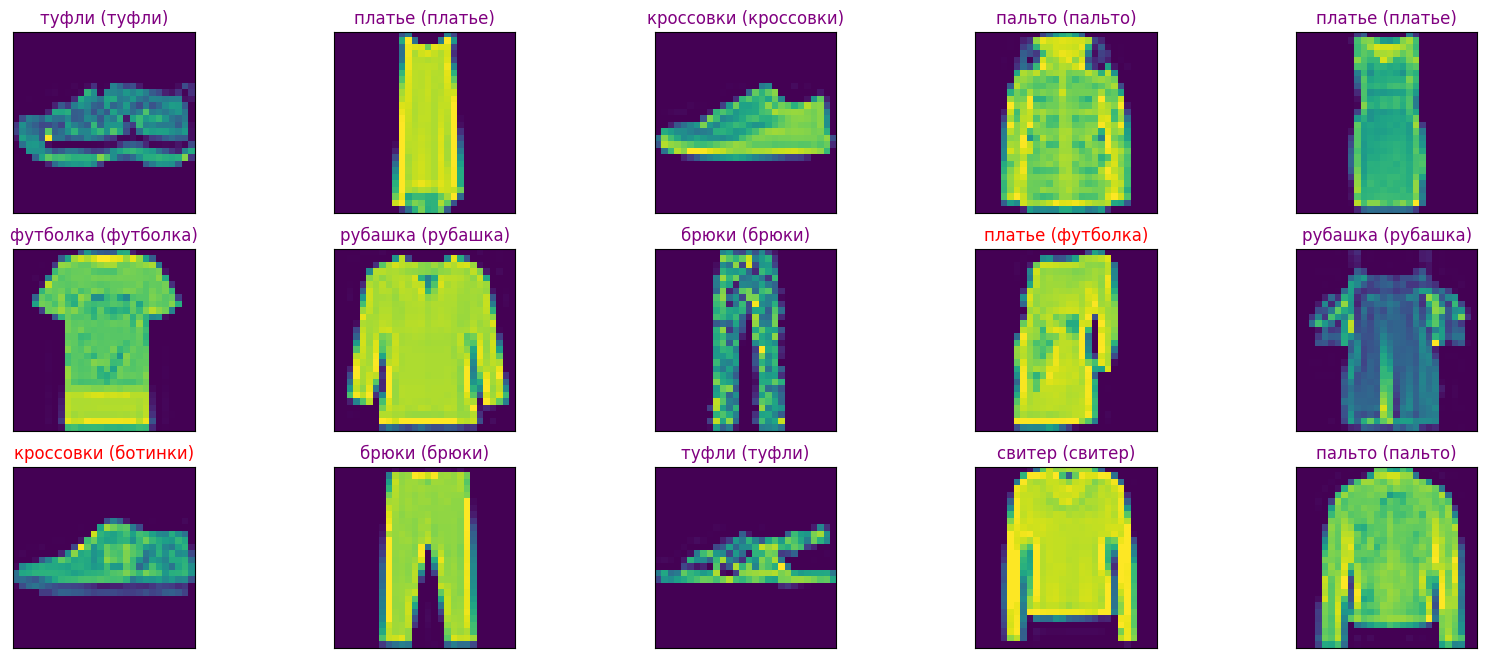

In [11]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
  ax=figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

  ax.imshow(np.squeeze(x_test[index]))
  predict_index = np.argmax(y_hat[index])
  true_index = np.argmax(y_test[index])

  ax.set_title("{} ({})".format(classes[predict_index],
                                classes[true_index]),
               color=("purple" if predict_index == true_index else "red"))

<H4>Висновок: Ця модель згорткової нейронної мережі має високу точність - близько 91% на тестових даних після тренування протягом 8 епох. Крім того, точність підвищувалась під час тренування, що показує, що модель є ефективною в навчанні. Модель була збережена, використовуючи ModelCheckpoint, щоб зберегти найкращі ваги під час навчання, тому ми можемо використовувати цю модель для подальших прогнозів.<H4>